In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [59]:
historico = pd.read_csv('datasets-2412-4042-LaLiga_dataset.csv')
asistenciaAway14_15 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2014-15.csv')
asistenciaAway15_16 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2015-16.csv')
asistenciaAway16_17 = pd.read_csv('17825-960796-bundle-archive/Away attendance 2016-17.csv')

asistenciaHome14_15 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2014-15.csv')
asistenciaHome15_16 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2015-16.csv')
asistenciaHome16_17 = pd.read_csv('17825-960796-bundle-archive/Home attendance 2016-17.csv')

In [60]:
historico = historico[(historico['season'] == '2014-15') | (historico['season'] == '2015-16')| (historico['season'] == '2016-17')]


In [61]:
names = historico.columns.tolist()
names[names.index('club')] = 'Team'
names[names.index('season')] = 'Season'
historico.columns = names

In [62]:
away = pd.concat([asistenciaAway14_15, asistenciaAway15_16,asistenciaAway16_17], axis=0)
home = pd.concat([asistenciaHome14_15, asistenciaHome15_16,asistenciaHome16_17], axis=0)
historico['Season'] = historico['Season'].replace('-','/',regex = True)

In [63]:
historico['Team'] = historico['Team'].replace('Atletico de Madrid','Atletico Madrid',regex = True)
historico['Team'] = historico['Team'].replace('Granada','Granada CF',regex = True)
historico['Team'] = historico['Team'].replace('Deportivo','Deportivo La Coruna',regex = True)
historico['Team'] = historico['Team'].replace('Elche','Elche CF',regex = True)
historico['Team'] = historico['Team'].replace('Almeria','UD Almeria',regex = True)
historico['Team'] = historico['Team'].replace('Celta de Vigo','Celta Vigo',regex = True)
historico['Team'] = historico['Team'].replace('Athletic Club','Athletic Bilbao',regex = True)
historico['Team'] = historico['Team'].replace('Sporting de Gijon','Sporting Gijon',regex = True)
historico['Team'] = historico['Team'].replace('Betis','Real Betis',regex = True)

df = pd.merge(away,historico,how = 'inner',on = ['Season','Team'])
df = pd.merge(df,home,how = 'inner',on = ['Season','Team'])
df.columns

Index(['League_x', 'Team', 'Avg Away Attendance', 'Total Away Attendance',
       'Highest Away Attendance', 'Lowest Away Attendance', 'Season', 'KEY_x',
       'home_win', 'away_win', 'home_loss', 'away_loss', 'matches_won',
       'matches_lost', 'matches_drawn', 'total_matches', 'points',
       'home_goals', 'away_goals', 'goals_scored', 'goals_conceded',
       'goal_difference', 'League_y', 'Avg Home Attendance',
       'Total Home Attendance', 'Highest Home Attendance',
       'Lowest Home Attendance', 'KEY_y'],
      dtype='object')

In [64]:
graficar = df.iloc[:,[1,2,10,11,23]]
graficar['Avg Away Attendance'] = graficar['Avg Away Attendance'].replace(',','',regex = True)
graficar['Avg Away Attendance'] = pd.to_numeric(graficar['Avg Away Attendance'])
graficar['Avg Home Attendance'] = graficar['Avg Home Attendance'].replace(',','',regex = True)
graficar['Avg Home Attendance'] = pd.to_numeric(graficar['Avg Home Attendance'])
graficar

/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/juancgarcia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Team,Avg Away Attendance,home_loss,away_loss,Avg Home Attendance
0,Real Madrid,31380,1,5,73667
1,Barcelona,29152,2,2,77632
2,Atletico Madrid,28831,2,4,46867
3,Valencia,28361,1,4,41609
4,Deportivo La Coruna,28001,8,9,21085
5,Real Sociedad,26937,5,9,21550
6,Sevilla,26852,1,7,30649
7,Eibar,26746,11,10,4835
8,Athletic Bilbao,26707,5,8,40951
9,Levante,26531,7,12,16357


In [65]:
pd.to_numeric(graficar['home_loss'])

0      1
1      2
2      2
3      1
4      8
5      5
6      1
7     11
8      5
9      7
10     6
11     5
12     9
13     5
14     8
15     6
16     5
17     9
18    12
19    10
20     2
21     2
22     1
23     4
24     6
25     5
26     8
27     7
28     4
29     3
30     7
31     6
32     6
33     8
34     5
35     7
36     4
37     6
38     7
39     7
40     1
41     1
42     1
43     3
44     2
45     6
46     7
47    11
48     4
49     7
50     6
51     7
52     4
53    10
54     6
55     4
56     8
57    10
Name: home_loss, dtype: int64

In [66]:
prueba = graficar.groupby(['Team']).agg({'Avg Away Attendance':'mean','away_loss':'mean','Avg Home Attendance':'mean','home_loss':'mean'})
prueba

,Avg Away Attendance,away_loss,Avg Home Attendance,home_loss
Team,,,,
Athletic Bilbao,28073.000000,9.000000,41166.333333,3.666667
Atletico Madrid,29773.666667,4.000000,46137.666667,2.000000
Barcelona,30616.333333,2.666667,78599.333333,1.666667
Celta Vigo,26488.666667,8.666667,18077.000000,6.000000
Cordoba,25384.000000,12.000000,16832.000000,12.000000
Deportivo La Coruna,27690.000000,8.333333,22464.000000,7.333333
Eibar,27863.333333,9.666667,5099.333333,7.666667
Elche CF,24113.000000,9.000000,21689.000000,10.000000
Espanyol,27447.000000,10.000000,19756.333333,5.333333


<IPython.core.display.Javascript object>


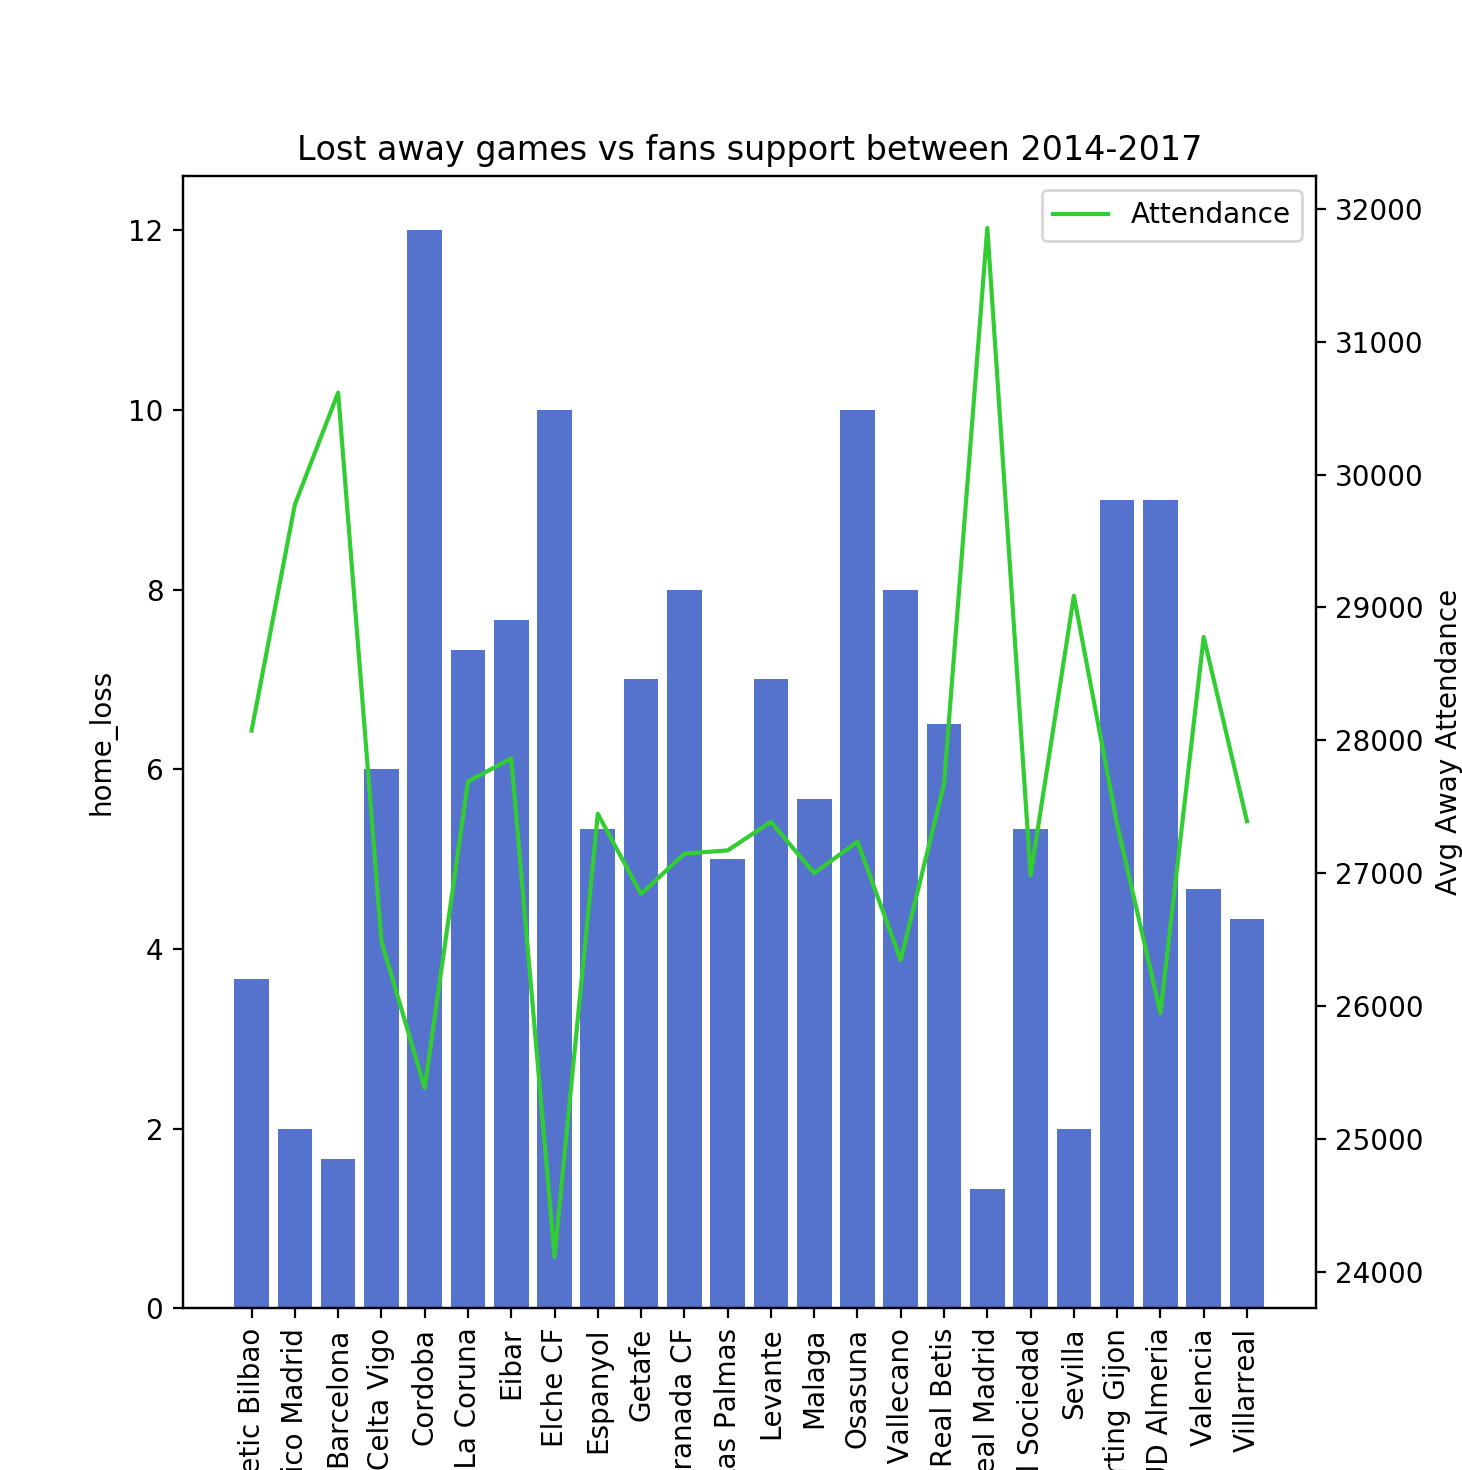

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
chart = sns.barplot(prueba.index,prueba['home_loss'],palette = ['royalblue'],label = 'Games Lost');
plt.title('Lost away games vs fans support between 2014-2017')
chart.set_xticklabels(prueba.index,rotation=90)
ax2 = ax1.twinx()
sns.lineplot(prueba.index,prueba['Avg Away Attendance'],color = 'limegreen',label = 'Attendance');
ax2.legend()




<IPython.core.display.Javascript object>


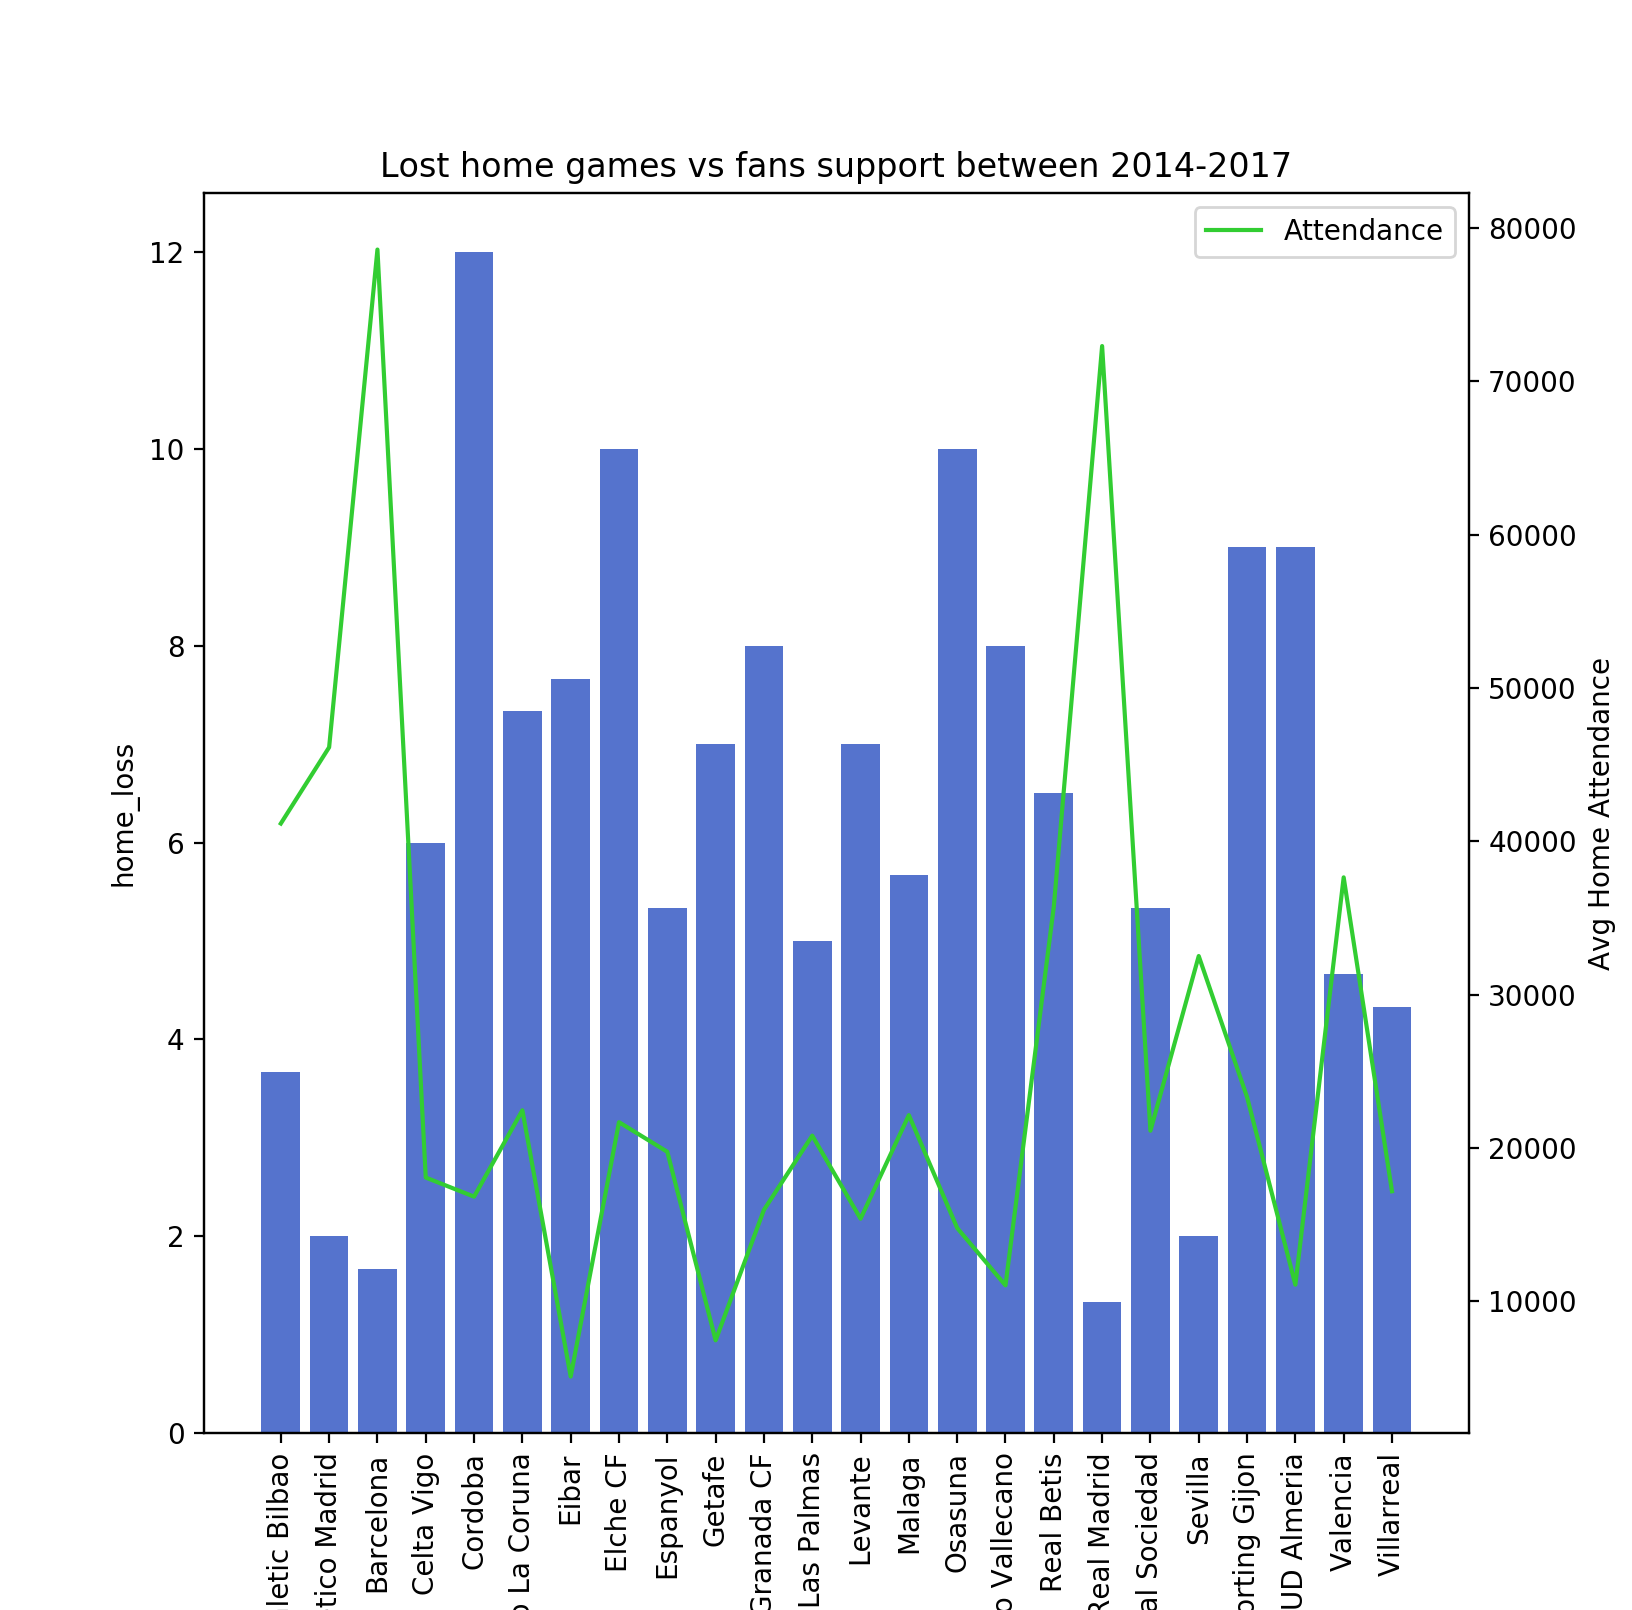

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
chart = sns.barplot(prueba.index,prueba['home_loss'],palette = ['royalblue'],label = 'Games Lost');
plt.title('Lost home games vs fans support between 2014-2017')
chart.set_xticklabels(prueba.index,rotation = 90)
ax2 = ax1.twinx()
sns.lineplot(prueba.index,prueba['Avg Home Attendance'],color = 'limegreen',label = 'Attendance');
ax2.legend()
